# Import necessary libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

# Load data

In [15]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Display the first few rows of each dataset
print("Customers Dataset:")
print(customers_df.head())
print("\nProducts Dataset:")
print(products_df.head())
print("\nTransactions Dataset:")
print(transactions_df.head())

Customers Dataset:
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127 

#Customer analysis

In [16]:
print("\nCustomer Analysis:")
print("Total number of customers:", len(customers_df))
print("Customers by region:\n", customers_df['Region'].value_counts())


Customer Analysis:
Total number of customers: 200
Customers by region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


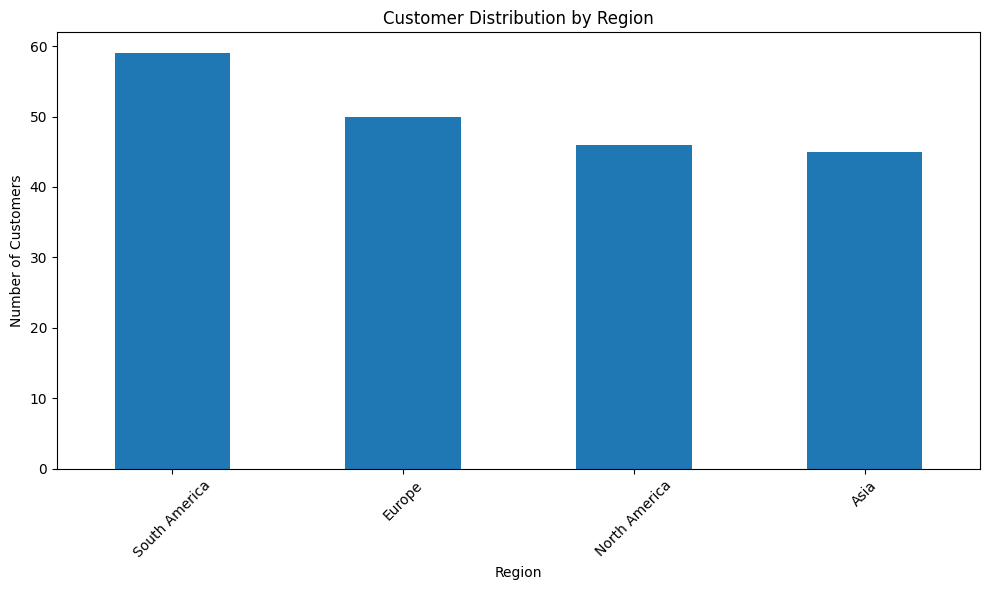

In [22]:
plt.figure(figsize=(10, 6))
customers_df['Region'].value_counts().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Product analysis

In [17]:
print("\nProduct Analysis:")
print("Total number of products:", len(products_df))
print("Products by category:\n", products_df['Category'].value_counts())


Product Analysis:
Total number of products: 100
Products by category:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


#Transaction analysis

In [18]:
print("\nTransaction Analysis:")
print("Total number of transactions:", len(transactions_df))
print("Total revenue: $", transactions_df['TotalValue'].sum())



Transaction Analysis:
Total number of transactions: 1000
Total revenue: $ 689995.56


#Customer signup trends

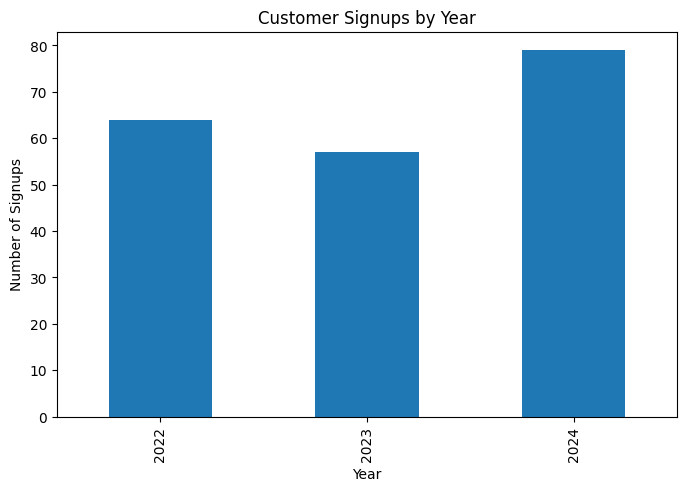

In [19]:
print("\nTransaction Analysis:")
print("Total number of transactions:", len(transactions_df))
print("Total revenue: $", transactions_df['TotalValue'].sum())


#Sales by category

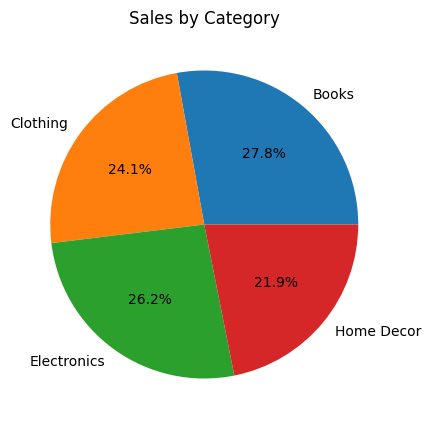

In [20]:
category_sales = transactions_df.merge(products_df, on='ProductID')
plt.figure(figsize=(8, 5))
category_sales.groupby('Category')['TotalValue'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Category')
plt.ylabel('')
plt.show()


# Transaction value distribution

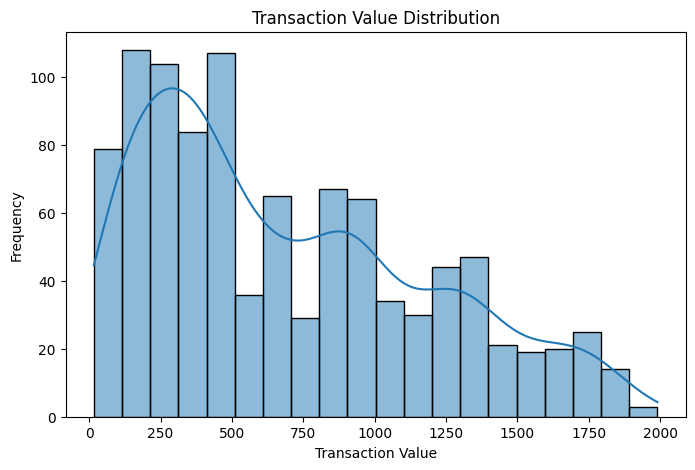

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(transactions_df['TotalValue'], bins=20, kde=True)
plt.title('Transaction Value Distribution')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()